# Step 1: Install and Import Libraries

In [1]:
# Get time series data
#import yfinance as yf

# Prophet model for time series forecast
from prophet import Prophet

# Data processing
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Model performance evaluation
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# Step 2: Pull Data

In [2]:
import pandas as pd
import requests

# Replace with your actual GitHub raw file URL
# github_url = "https://raw.githubusercontent.com/cfwiecha/Fall2024Capstone/refs/heads/main/frontend_shipping_source_300m_30s_pruned.json"

github_url = "https://raw.githubusercontent.com/delphine-boke/aiops-lab6-raw-file/refs/heads/main/boutique_training_finalCopy.json"
try:
    response = requests.get(github_url)
    response.raise_for_status()  # Raise an exception for bad status codes (4xx or 5xx)

    data = response.json()
    df_train = pd.DataFrame( data['data']['result'][0]['values'] )
    df_train.columns = ['ds', 'y']
    print( df_train.head() )

except requests.exceptions.RequestException as e:
    print(f"Error fetching data from GitHub: {e}")
except ValueError as e:
    print(f"Error decoding JSON response: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

           ds                   y
0  1732122000   3.017543859649123
1  1732122030   3.069565217391304
2  1732122060   3.087719298245614
3  1732122090                3.06
4  1732122120  3.0497925311203318


In [3]:
import json

In [4]:
f = open("boutique_training_finalCopy.json")
prom = json.load(f)
df_train = pd.DataFrame( data['data']['result'][0]['values'] )
df_train.columns = ['ds', 'y']
df_train

,ds,y
0,1732122000,3.017543859649123
1,1732122030,3.069565217391304
2,1732122060,3.087719298245614
3,1732122090,3.06
4,1732122120,3.0497925311203318
...,...,...
216,1732128930,3.0357142857142856
217,1732128960,3.0160000000000005
218,1732128990,3
219,1732129020,3


In [5]:
# Replace with your actual GitHub raw file URL
# github_url = "https://raw.githubusercontent.com/cfwiecha/Fall2024Capstone/refs/heads/main/20min.json"

github_url = "https://raw.githubusercontent.com/delphine-boke/aiops-lab6-raw-file/refs/heads/main/boutique_training_finalCopy.json"

try:
    response = requests.get(github_url)
    response.raise_for_status()  # Raise an exception for bad status codes (4xx or 5xx)

    data = response.json()
    df_test = pd.DataFrame( data['data']['result'][0]['values'] )
    df_test.columns = ['ds', 'y']
    print( df_test.head() )

except requests.exceptions.RequestException as e:
    print(f"Error fetching data from GitHub: {e}")
except ValueError as e:
    print(f"Error decoding JSON response: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")



           ds                   y
0  1732122000   3.017543859649123
1  1732122030   3.069565217391304
2  1732122060   3.087719298245614
3  1732122090                3.06
4  1732122120  3.0497925311203318


In [6]:
df_test

,ds,y
0,1732122000,3.017543859649123
1,1732122030,3.069565217391304
2,1732122060,3.087719298245614
3,1732122090,3.06
4,1732122120,3.0497925311203318
...,...,...
216,1732128930,3.0357142857142856
217,1732128960,3.0160000000000005
218,1732128990,3
219,1732129020,3


In [7]:
#align test timestamps with training by time shifting back to the first train time...assume test data starts from 0 cycle time like training data

train_start_ds = df_train['ds'].iloc[0]
print(train_start_ds)

df_train['ds'] = df_train['ds'] - train_start_ds

df_train.head()

1732122000


,ds,y
0,0,3.017543859649123
1,30,3.069565217391304
2,60,3.087719298245614
3,90,3.06
4,120,3.0497925311203318


In [8]:
#align test timestamps with training by time shifting back to the first train time...assume test data starts from 0 cycle time like training data

test_start_ds = df_test['ds'].iloc[0]
print(test_start_ds)

df_test['ds'] = df_test['ds'] - test_start_ds

df_test.head()

1732122000


,ds,y
0,0,3.017543859649123
1,30,3.069565217391304
2,60,3.087719298245614
3,90,3.06
4,120,3.0497925311203318


In [9]:
from datetime import datetime

In [10]:
df_train['ds'] = df_train['ds'].apply(lambda sec: datetime.fromtimestamp(sec))
df_train

,ds,y
0,1970-01-01 02:00:00,3.017543859649123
1,1970-01-01 02:00:30,3.069565217391304
2,1970-01-01 02:01:00,3.087719298245614
3,1970-01-01 02:01:30,3.06
4,1970-01-01 02:02:00,3.0497925311203318
...,...,...
216,1970-01-01 03:55:30,3.0357142857142856
217,1970-01-01 03:56:00,3.0160000000000005
218,1970-01-01 03:56:30,3
219,1970-01-01 03:57:00,3


In [11]:
df_test['ds'] = df_test['ds'].apply(lambda sec: datetime.fromtimestamp(sec))
df_test

,ds,y
0,1970-01-01 02:00:00,3.017543859649123
1,1970-01-01 02:00:30,3.069565217391304
2,1970-01-01 02:01:00,3.087719298245614
3,1970-01-01 02:01:30,3.06
4,1970-01-01 02:02:00,3.0497925311203318
...,...,...
216,1970-01-01 03:55:30,3.0357142857142856
217,1970-01-01 03:56:00,3.0160000000000005
218,1970-01-01 03:56:30,3
219,1970-01-01 03:57:00,3


In [12]:
# Information on the dataframe
df_train['y']=df_train['y'].astype(float)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      221 non-null    datetime64[ns]
 1   y       221 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.6 KB


In [13]:
# Information on the dataframe
df_test['y']=df_test['y'].astype(float)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      221 non-null    datetime64[ns]
 1   y       221 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.6 KB


Next, let's visualize the closing prices of the two tickers using `seaborn`, and add the legend to the plot using `matplotlib`. We can see that the price for Google increased a lot starting in late 2020, and almost doubled in late 2021.

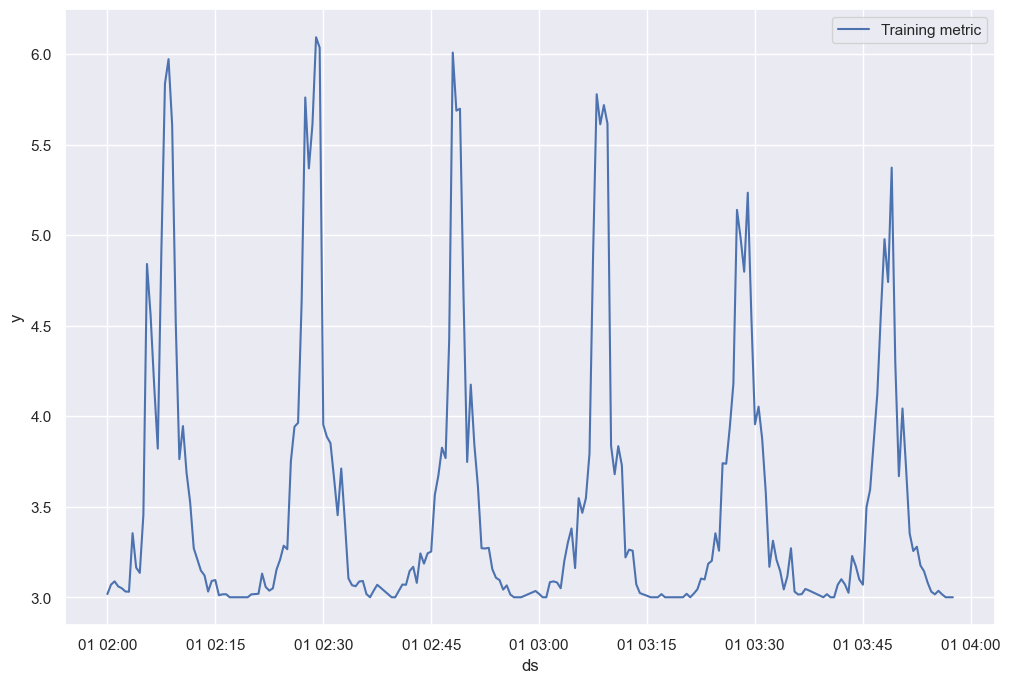

In [14]:
# Visualize data using seaborn
sns.set(rc={'figure.figsize':(12,8)})
sns.lineplot(x=df_train['ds'], y=df_train['y'])
plt.legend(['Training metric'])

# Step 3: Build Time Series Model Using Prophet in Python

In [15]:
# Add seasonality
model = Prophet(interval_width=0.99, yearly_seasonality=False, weekly_seasonality=False, daily_seasonality=False, growth='flat')
model.add_seasonality(name='hourly', period=1/24, fourier_order=5)

# Fit the model on the training dataset
model.fit(df_train)

21:12:44 - cmdstanpy - INFO - Chain [1] start processing
21:12:44 - cmdstanpy - INFO - Chain [1] done processing


# Step 4: Make Predictions Using Prophet in Python

After building the model, in step 4, we use the model to make predictions on the dataset. The forecast plot shows that the predictions are in general aligned with the actual values.

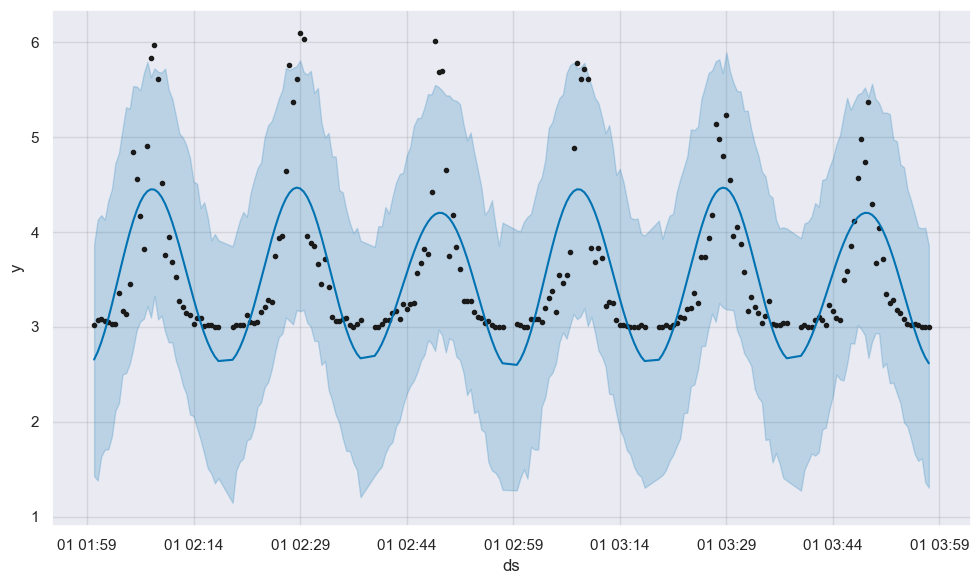

In [16]:
# Make prediction
forecast = model.predict(df_test)

# Visualize the forecast
model.plot(forecast); # Add semi-colon to remove the duplicated chart

We can also check the components plot for the trend, weekly seasonality, and yearly seasonality.

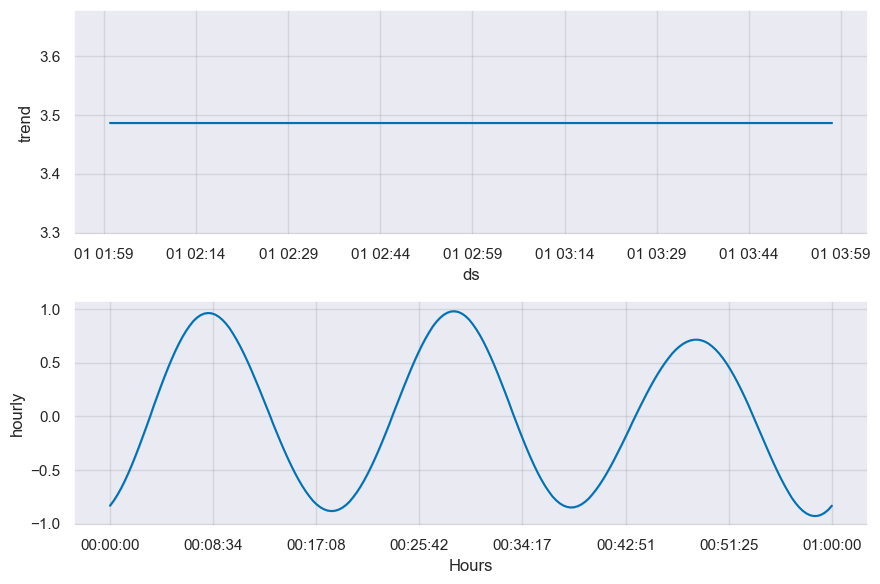

In [17]:
# Visualize the forecast components
model.plot_components(forecast);

# Step 5: Check Time Series Model Performace

In [18]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,hourly,hourly_lower,hourly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1970-01-01 02:00:00,3.487352,1.427618,3.870223,3.487352,3.487352,-0.831246,-0.831246,-0.831246,-0.831246,-0.831246,-0.831246,0.0,0.0,0.0,2.656106
1,1970-01-01 02:00:30,3.487352,1.380997,4.129452,3.487352,3.487352,-0.751807,-0.751807,-0.751807,-0.751807,-0.751807,-0.751807,0.0,0.0,0.0,2.735545
2,1970-01-01 02:01:00,3.487352,1.634341,4.177514,3.487352,3.487352,-0.651306,-0.651306,-0.651306,-0.651306,-0.651306,-0.651306,0.0,0.0,0.0,2.836047
3,1970-01-01 02:01:30,3.487352,1.705846,4.131248,3.487352,3.487352,-0.532343,-0.532343,-0.532343,-0.532343,-0.532343,-0.532343,0.0,0.0,0.0,2.955010
4,1970-01-01 02:02:00,3.487352,1.709912,4.332646,3.487352,3.487352,-0.398116,-0.398116,-0.398116,-0.398116,-0.398116,-0.398116,0.0,0.0,0.0,3.089236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,1970-01-01 03:55:30,3.487352,1.664078,4.195705,3.487352,3.487352,-0.519249,-0.519249,-0.519249,-0.519249,-0.519249,-0.519249,0.0,0.0,0.0,2.968103
217,1970-01-01 03:56:00,3.487352,1.588543,4.052839,3.487352,3.487352,-0.630450,-0.630450,-0.630450,-0.630450,-0.630450,-0.630450,0.0,0.0,0.0,2.856902
218,1970-01-01 03:56:30,3.487352,1.615127,4.039014,3.487352,3.487352,-0.728134,-0.728134,-0.728134,-0.728134,-0.728134,-0.728134,0.0,0.0,0.0,2.759218
219,1970-01-01 03:57:00,3.487352,1.361109,4.045848,3.487352,3.487352,-0.809181,-0.809181,-0.809181,-0.809181,-0.809181,-0.809181,0.0,0.0,0.0,2.678171


In [19]:
# Merge actual and predicted values
performance = pd.merge(df_test, forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds')

In [20]:
performance

,ds,y,yhat,yhat_lower,yhat_upper
0,1970-01-01 02:00:00,3.017544,2.656106,1.427618,3.870223
1,1970-01-01 02:00:30,3.069565,2.735545,1.380997,4.129452
2,1970-01-01 02:01:00,3.087719,2.836047,1.634341,4.177514
3,1970-01-01 02:01:30,3.060000,2.955010,1.705846,4.131248
4,1970-01-01 02:02:00,3.049793,3.089236,1.709912,4.332646
...,...,...,...,...,...
216,1970-01-01 03:55:30,3.035714,2.968103,1.664078,4.195705
217,1970-01-01 03:56:00,3.016000,2.856902,1.588543,4.052839
218,1970-01-01 03:56:30,3.000000,2.759218,1.615127,4.039014
219,1970-01-01 03:57:00,3.000000,2.678171,1.361109,4.045848


In [23]:
# Check MAE value
performance_MAE = mean_absolute_error(performance['y'], performance['yhat'])
print(f'The MAE for the model is    {performance_MAE:.5f}')

# Check MAPE value
performance_MAPE = mean_absolute_percentage_error(performance['y'], performance['yhat'])
print(f'The MAPE for the model is   {performance_MAPE:.5f}')

The MAE for the model is    0.39200
The MAPE for the model is   0.10330


# Step 6: Identify Anomalies

In step 6, we will identify the time series anomalies by checking if the actual value is outside of the uncertainty interval. If the actual value is smaller than the lower bound or larger than the upper bound of the uncertainty interval, the anomaly indicator is set to 1, otherwise, it's set to 0.

Using `value_counts()`, we can see that there are 6 outliers out of 505 data points.

In [24]:
# Create an anomaly indicator
performance['anomaly'] = performance.apply(lambda rows: 1 if ((float(rows.y)<rows.yhat_lower)|(float(rows.y)>rows.yhat_upper)) else 0, axis = 1)


In [25]:
performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ds          221 non-null    datetime64[ns]
 1   y           221 non-null    float64       
 2   yhat        221 non-null    float64       
 3   yhat_lower  221 non-null    float64       
 4   yhat_upper  221 non-null    float64       
 5   anomaly     221 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 10.5 KB


In [26]:
# Check the number of anomalies
performance['anomaly'].value_counts()

anomaly
0    212
1      9
Name: count, dtype: int64

After printing out the anomalies, we can see that all the outliers are lower than the lower bound of the uncertainty interval.

In [27]:
# Take a look at the anomalies
anomalies = performance[performance['anomaly']==1].sort_values(by='ds')
anomalies

,ds,y,yhat,yhat_lower,yhat_upper,anomaly
16,1970-01-01 02:08:00,5.836614,4.450632,3.098378,5.633431,1
17,1970-01-01 02:08:30,5.972222,4.446837,3.327569,5.725206,1
52,1970-01-01 02:27:30,5.760417,4.413706,3.064486,5.706684,1
55,1970-01-01 02:29:00,6.093074,4.458993,3.164764,5.808848,1
56,1970-01-01 02:29:30,6.035714,4.425716,3.179049,5.687157,1
90,1970-01-01 02:48:00,6.008584,4.186588,2.747629,5.550712,1
91,1970-01-01 02:48:30,5.687732,4.202180,2.972372,5.529280,1
92,1970-01-01 02:49:00,5.698113,4.200605,2.909612,5.491797,1
127,1970-01-01 03:08:00,5.778210,4.450632,3.081020,5.723639,1


In the visualization, all the dots are actual values and the black line represents the predicted values. The orange dots are the outliers.

<Axes: xlabel='ds', ylabel='y'>

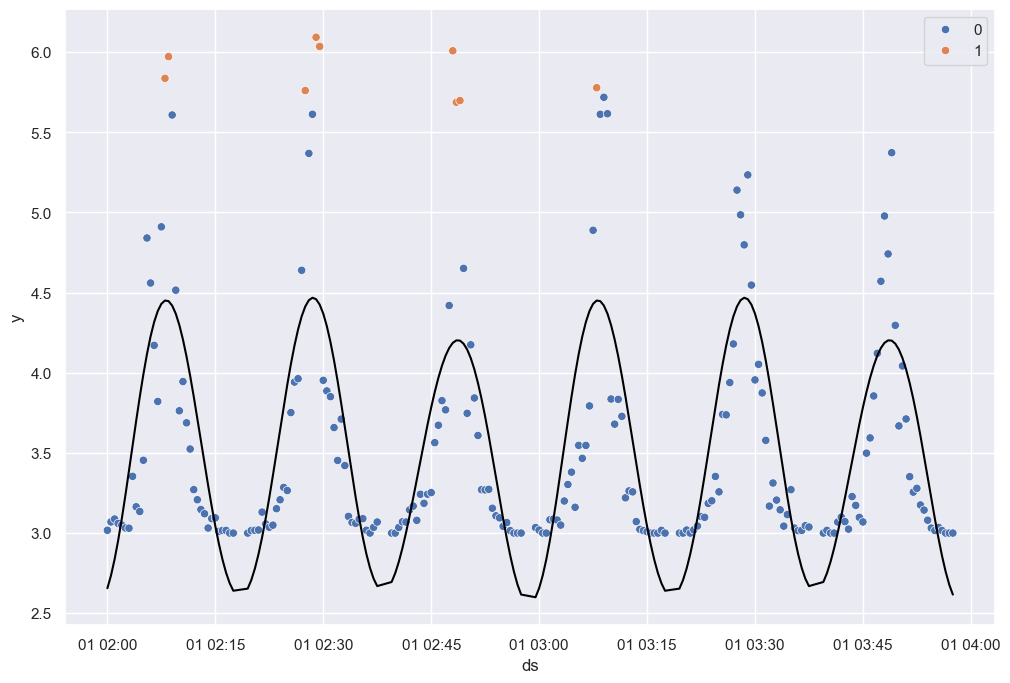

In [28]:
# Visualize the anomalies
sns.scatterplot(x='ds', y='y', data=performance, hue='anomaly')
sns.lineplot(x='ds', y='yhat', data=performance, color='black')